In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [4]:

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:

train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow(
    X_train, y_train,
    batch_size=32,
    subset='training'
)

val_generator = train_datagen.flow(
    X_train, y_train,
    batch_size=32,
    subset='validation'
)

In [6]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', strides=2, input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:

history = model.fit(
    train_generator,
    epochs=20,
    batch_size=32,
    validation_data=val_generator
)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 63s 50ms/step - accuracy: 0.7715 - loss: 0.6452 - val_accuracy: 0.7212 - val_loss: 0.8115
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.7729 - loss: 0.6384 - val_accuracy: 0.7317 - val_loss: 0.7974
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 64s 51ms/step - accuracy: 0.7738 - loss: 0.6373 - val_accuracy: 0.7251 - val_loss: 0.8054
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 64s 51ms/step - accuracy: 0.7719 - loss: 0.6515 - val_accuracy: 0.7200 - val_loss: 0.8242
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 65s 52ms/step - accuracy: 0.7691 - loss: 0.6464 - val_accuracy: 0.7100 - val_loss: 0.8447
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 62s 50ms/step - accuracy: 0.7730 - loss: 0.6442 - val_accuracy: 0.7231 - val_loss: 0.8072
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 53ms/step - accuracy: 0.7735 - loss: 0.6365 - val_accuracy: 0.7234 - val_loss: 0.8015
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 53ms/step - accuracy: 0.7690 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7481 - loss: 0.7857
Test Accuracy: 0.7501
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


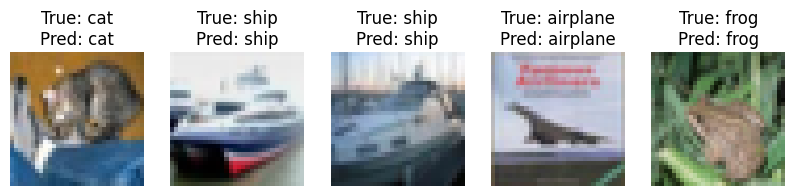

In [14]:

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

sample_images = X_test[:5]
sample_labels = y_test[:5]
predictions = model.predict(sample_images)
predicted_classes = tf.argmax(predictions, axis=1)
true_classes = tf.argmax(sample_labels, axis=1)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {class_names[true_classes[i]]}\nPred: {class_names[predicted_classes[i]]}")
    plt.axis('off')
plt.show()

In [15]:

print("""
Analysis:
1. **Padding='same'** ensures spatial dimensions are preserved after convolution, which helps retain information.
2. **Stride=2** reduces spatial dimensions faster, making the network computationally cheaper but potentially losing fine details.
3. **Data Augmentation** artificially increases dataset diversity, improving generalization and reducing overfitting.
""")


Analysis:
1. **Padding='same'** ensures spatial dimensions are preserved after convolution, which helps retain information.
2. **Stride=2** reduces spatial dimensions faster, making the network computationally cheaper but potentially losing fine details.
3. **Data Augmentation** artificially increases dataset diversity, improving generalization and reducing overfitting.

